Jupyter

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/18 23:13:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 01-BU
#Explain the business case for data mining

In [4]:
# 02-DU
import pandas as pd
# Read Excel files into Spark DataFrame
oxid_co2_excel_path1 = 'Datasets/owid-co2.xlsx'
oxid_co2_1_pd = pd.read_excel(oxid_co2_excel_path1)

oxid_co2_excel_path2 = 'Datasets/owid-co2(1).xlsx'
oxid_co2_2_pd = pd.read_excel(oxid_co2_excel_path2)

In [5]:
# Convert Pandas DataFrame to PySpark DataFrame
oxid_co2_1 = spark.createDataFrame(oxid_co2_1_pd)

oxid_co2_2 = spark.createDataFrame(oxid_co2_2_pd)

In [6]:
# Show all columns for dataset1. 
oxid_co2_1.show()

+--------+-----------+-----+----+------+--------------+--------------+-----------+-------------------+---------------------+-------------------+----------------------+------------------+------------------+---------+--------------+-------+------------------+-------------+------------------------+-----------+------------------+
|iso_code|    country|state|year|   co2|co2_per_capita|cumulative_co2|co2_per_gdp|co2_per_unit_energy|cumulative_cement_co2|cumulative_coal_co2|cumulative_flaring_co2|cumulative_gas_co2|cumulative_oil_co2|total_ghg|ghg_per_capita|methane|methane_per_capita|nitrous_oxide|nitrous_oxide_per_capita| population|               gdp|
+--------+-----------+-----+----+------+--------------+--------------+-----------+-------------------+---------------------+-------------------+----------------------+------------------+------------------+---------+--------------+-------+------------------+-------------+------------------------+-----------+------------------+
|     AFG|Afghan

In [7]:
# Show all columns for dataset2. 
oxid_co2_2.show()

+--------+-----------+-----+----+--------+----------+-----------+-------+-------+---------------------+-------------------+----------------------+------------------+------------------+--------------------------+-----------------+--------------+
|iso_code|    country|state|year|coal_co2|cement_co2|flaring_co2|gas_co2|oil_co2|cement_co2_per_capita|coal_co2_per_capita|flaring_co2_per_capita|gas_co2_per_capita|oil_co2_per_capita|primary_energy_consumption|energy_per_capita|energy_per_gdp|
+--------+-----------+-----+----+--------+----------+-----------+-------+-------+---------------------+-------------------+----------------------+------------------+------------------+--------------------------+-----------------+--------------+
|     AFG|Afghanistan| Asia|2000|   0.004|      0.01|      0.022|  0.224|  0.498|                  0.0|                0.0|                 0.001|             0.011|             0.024|                     5.777|          277.985|          0.35|
|     AFG|Afghanista

In [8]:
# Show basic info
oxid_co2_1.printSchema()

oxid_co2_1.show(5)  # showing the first five observations

root
 |-- iso_code: string (nullable = true)
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- year: long (nullable = true)
 |-- co2: double (nullable = true)
 |-- co2_per_capita: double (nullable = true)
 |-- cumulative_co2: double (nullable = true)
 |-- co2_per_gdp: double (nullable = true)
 |-- co2_per_unit_energy: double (nullable = true)
 |-- cumulative_cement_co2: double (nullable = true)
 |-- cumulative_coal_co2: double (nullable = true)
 |-- cumulative_flaring_co2: double (nullable = true)
 |-- cumulative_gas_co2: double (nullable = true)
 |-- cumulative_oil_co2: double (nullable = true)
 |-- total_ghg: double (nullable = true)
 |-- ghg_per_capita: double (nullable = true)
 |-- methane: double (nullable = true)
 |-- methane_per_capita: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- nitrous_oxide_per_capita: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)

+--------+-

In [9]:
# Convert PySpark DataFrame to Pandas DataFrame
oxid_co2_pd1 = oxid_co2_1.toPandas()

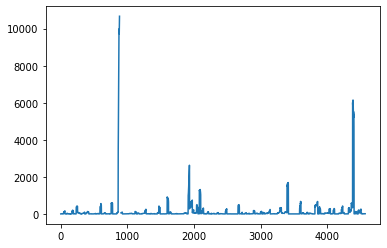

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Line plot
oxid_co2_pd1['co2'].plot()

# Show plots
plt.show()

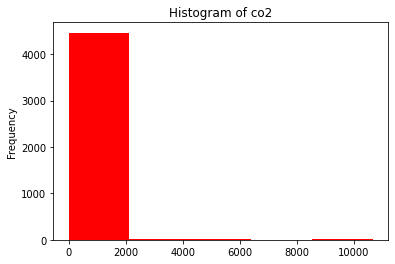

In [11]:
# Histogram
oxid_co2_pd1['co2'].plot.hist(bins=5, color='red', xlabel='co2 range', title='Histogram of co2')

# Show plots
plt.show()

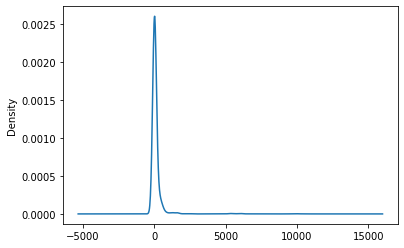

In [12]:
# Density plot
oxid_co2_pd1['co2'].plot.density()

# Show plots
plt.show()

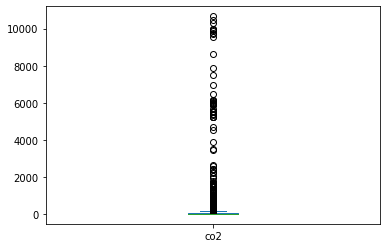

In [13]:
# Box plot
oxid_co2_pd1['co2'].plot.box()

# Show plots
plt.show()

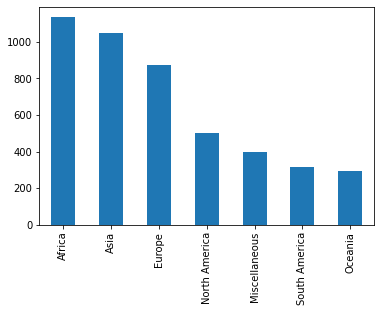

In [14]:
# Bar plot
oxid_co2_pd1['state'].value_counts().plot.bar()

# Show plots
plt.show()

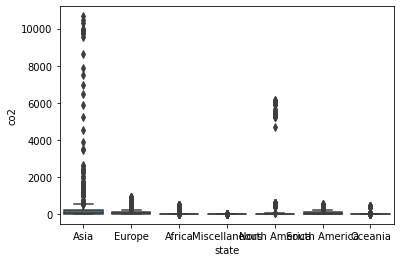

In [15]:
# Box plot by state
sns.boxplot(x='state', y='co2', data=oxid_co2_pd1)

# Show plots
plt.show()

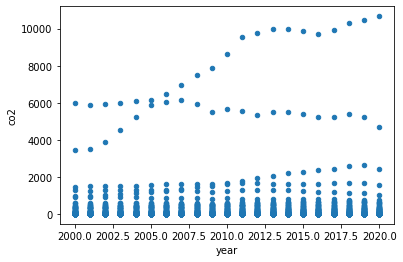

In [16]:
# Scatter plot
oxid_co2_pd1.plot.scatter(x='year', y='co2')

# Show plots
plt.show()

In [17]:
from pyspark.sql import functions as F
# Selected columns
feature_cols = oxid_co2_1.select('co2', 'population', 'gdp', 'methane', 'nitrous_oxide')
cleaned_feature_cols1 = feature_cols.dropna()

# Calculate the correlation between each pair of columns
correlations = [(c1, c2, round(cleaned_feature_cols1.agg(F.corr(c1, c2)).collect()[0][0], 2))
                for i, c1 in enumerate(cleaned_feature_cols1.columns)
                for c2 in cleaned_feature_cols1.columns[i+1:]]

# Print the correlation between each pair of columns
for c1, c2, corr in correlations:
    print("Correlation between", c1, "and", c2, ":", corr)

Correlation between co2 and population : 0.74
Correlation between co2 and gdp : 0.94
Correlation between co2 and methane : 0.83
Correlation between co2 and nitrous_oxide : 0.89
Correlation between population and gdp : 0.68
Correlation between population and methane : 0.81
Correlation between population and nitrous_oxide : 0.89
Correlation between gdp and methane : 0.8
Correlation between gdp and nitrous_oxide : 0.85
Correlation between methane and nitrous_oxide : 0.9


In [18]:
# Summary statistics for 'co2'
cleaned_feature_cols2 = oxid_co2_1.select('co2').dropna()
co2_summary_stat = cleaned_feature_cols2.select('co2').describe().show()

+-------+------------------+
|summary|               co2|
+-------+------------------+
|  count|              4513|
|   mean|145.07564613339227|
| stddev| 703.9223481737529|
|    min|             0.004|
|    max|         10667.887|
+-------+------------------+



In [19]:
# Find the 25th, 50th, and 75th percentiles of column 'co2'
percentiles = cleaned_feature_cols2.approxQuantile("co2", [0.25, 0.5, 0.75], 0.01)

# Calculation range
q1, median, q3 = percentiles
iqr = q3 - q1

print("25% Range:", round(q1,2))
print("50% Range (Median):", round(median,2))
print("75% Range:", round(q3,2))
print("Interquartile Range (IQR):", round(iqr,2))

25% Range: 0.92
50% Range (Median): 7.34
75% Range: 53.02
Interquartile Range (IQR): 52.1


In [20]:
from pyspark.sql.functions import isnan, when, count, col
# Display the number of NaN values in each column
nan_counts = oxid_co2_1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in oxid_co2_1.columns])
nan_counts.show()

+--------+-------+-----+----+---+--------------+--------------+-----------+-------------------+---------------------+-------------------+----------------------+------------------+------------------+---------+--------------+-------+------------------+-------------+------------------------+----------+----+
|iso_code|country|state|year|co2|co2_per_capita|cumulative_co2|co2_per_gdp|co2_per_unit_energy|cumulative_cement_co2|cumulative_coal_co2|cumulative_flaring_co2|cumulative_gas_co2|cumulative_oil_co2|total_ghg|ghg_per_capita|methane|methane_per_capita|nitrous_oxide|nitrous_oxide_per_capita|population| gdp|
+--------+-------+-----+----+---+--------------+--------------+-----------+-------------------+---------------------+-------------------+----------------------+------------------+------------------+---------+--------------+-------+------------------+-------------+------------------------+----------+----+
|       0|      0|    0|   0| 55|            76|            55|       1412|       

In [21]:
# Get the number of rows
num_rows = oxid_co2_1.count()

# Get the number of columns
num_cols = len(oxid_co2_1.columns)

print("rows:", num_rows)
print("columns:", num_cols)

rows: 4568
columns: 22


In [22]:
# 03-DP
# Summary statistics for 'co2_per_capita'
cleaned_feature_cols3 = oxid_co2_1.select('co2_per_capita').dropna()
co2_summary_stat = cleaned_feature_cols3.select('co2_per_capita').describe().show()

+-------+-----------------+
|summary|   co2_per_capita|
+-------+-----------------+
|  count|             4492|
|   mean|5.157040961709716|
| stddev| 6.61106795645987|
|    min|            0.016|
|    max|           67.012|
+-------+-----------------+



In [23]:
# Find the 25th, 50th, and 75th percentiles of column 'co2_per_capita'
percentiles2 = cleaned_feature_cols3.approxQuantile("co2_per_capita", [0.25, 0.5, 0.75], 0.01)

# Calculation range
q1_2, median_2, q3_2 = percentiles2
iqr_2 = q3_2 - q1_2

print("25% Range:", round(q1_2,2))
print("50% Range (Median):", round(median_2,2))
print("75% Range:", round(q3_2,2))
print("Interquartile Range (IQR):", round(iqr_2,2))

25% Range: 0.74
50% Range (Median): 2.78
75% Range: 7.0
Interquartile Range (IQR): 6.26


In [24]:
# Selected columns that related to objective
selected_col1 = oxid_co2_1.select('country','state','year','co2','methane','nitrous_oxide','population','gdp')
selected_col1.show()

+-----------+-----+----+------+-------+-------------+-----------+------------------+
|    country|state|year|   co2|methane|nitrous_oxide| population|               gdp|
+-----------+-----+----+------+-------+-------------+-----------+------------------+
|Afghanistan| Asia|2000| 0.758|  10.59|         3.62|2.0779957E7|  1.12837932147E10|
|Afghanistan| Asia|2001| 0.798|   9.36|         3.22|2.1606992E7|   1.1021272774E10|
|Afghanistan| Asia|2002| 1.052|  11.21|         3.72|2.2600774E7|    1.880487176E10|
|Afghanistan| Asia|2003| 1.186|  11.56|         3.92|2.3680871E7|   2.1074344026E10|
|Afghanistan| Asia|2004| 0.889|  11.47|         3.82|2.4726689E7|  2.23325719314E10|
|Afghanistan| Asia|2005| 1.303|  11.68|         3.97|2.5654274E7|  2.53976873135E10|
|Afghanistan| Asia|2006| 1.635|  14.89|         4.06|2.6433058E7|  2.87044010764E10|
|Afghanistan| Asia|2007| 2.269|   18.1|         4.25|2.7100542E7|  3.45075296229E10|
|Afghanistan| Asia|2008|   4.2|  22.19|         4.81|2.7722281E7|

In [25]:
from pyspark.sql.functions import mean
# Calculate the mean of the CO2 column
cleaned_feature_co2 = selected_col1.select('co2').dropna()
mean_value_co2 = round(cleaned_feature_co2.select(mean('co2')).collect()[0][0],2)

# Replace the null values in the CO2 column with the mean value
selected_col1 = selected_col1.fillna(mean_value_co2, subset=['co2'])

In [26]:
# Repeat previous step for other attributes
cleaned_feature_methane = selected_col1.select('methane').dropna()
mean_value_methane = round(cleaned_feature_methane.select(mean('methane')).collect()[0][0],2)
selected_col1 = selected_col1.fillna(mean_value_methane, subset=['methane'])

cleaned_feature_nitrous_oxide = selected_col1.select('nitrous_oxide').dropna()
mean_value_nitrous_oxide = round(cleaned_feature_nitrous_oxide.select(mean('nitrous_oxide')).collect()[0][0],2)
selected_col1 = selected_col1.fillna(mean_value_nitrous_oxide, subset=['nitrous_oxide'])

cleaned_feature_population = selected_col1.select('population').dropna()
mean_value_population = round(cleaned_feature_population.select(mean('population')).collect()[0][0],2)
selected_col1 = selected_col1.fillna(mean_value_population, subset=['population'])

cleaned_feature_gdp = selected_col1.select('gdp').dropna()
mean_value_gdp = round(cleaned_feature_gdp.select(mean('gdp')).collect()[0][0],2)
selected_col1 = selected_col1.fillna(mean_value_gdp, subset=['gdp'])

In [27]:
# Show the data after imputing null values
selected_col1.show()

+-----------+-----+----+------+-------+-------------+-----------+------------------+
|    country|state|year|   co2|methane|nitrous_oxide| population|               gdp|
+-----------+-----+----+------+-------+-------------+-----------+------------------+
|Afghanistan| Asia|2000| 0.758|  10.59|         3.62|2.0779957E7|  1.12837932147E10|
|Afghanistan| Asia|2001| 0.798|   9.36|         3.22|2.1606992E7|   1.1021272774E10|
|Afghanistan| Asia|2002| 1.052|  11.21|         3.72|2.2600774E7|    1.880487176E10|
|Afghanistan| Asia|2003| 1.186|  11.56|         3.92|2.3680871E7|   2.1074344026E10|
|Afghanistan| Asia|2004| 0.889|  11.47|         3.82|2.4726689E7|  2.23325719314E10|
|Afghanistan| Asia|2005| 1.303|  11.68|         3.97|2.5654274E7|  2.53976873135E10|
|Afghanistan| Asia|2006| 1.635|  14.89|         4.06|2.6433058E7|  2.87044010764E10|
|Afghanistan| Asia|2007| 2.269|   18.1|         4.25|2.7100542E7|  3.45075296229E10|
|Afghanistan| Asia|2008|   4.2|  22.19|         4.81|2.7722281E7|

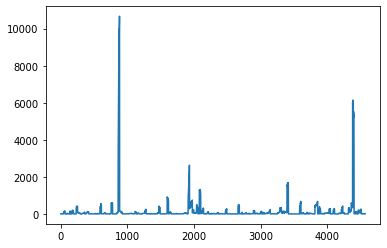

In [28]:
# Convert PySpark DataFrame to Pandas DataFrame
selected_col_pd1 = selected_col1.toPandas()

# Line plot after imputing null values
selected_col_pd1['co2'].plot()

# Show plots
plt.show()

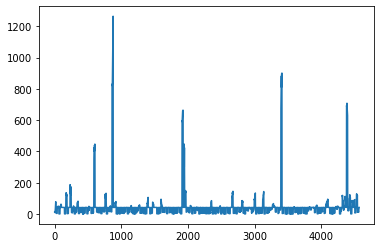

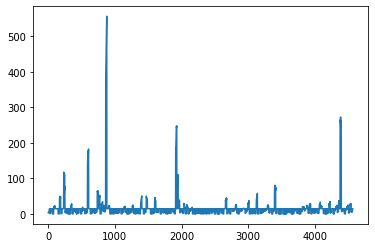

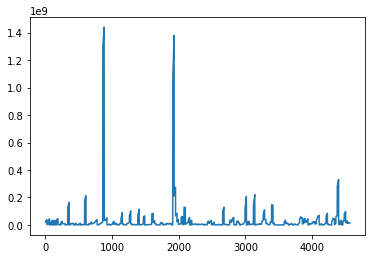

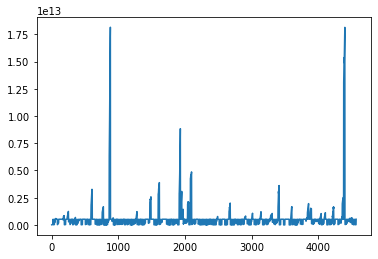

In [29]:
# Repeat previous step for other attributes
selected_col_pd1['methane'].plot()
plt.show()

selected_col_pd1['nitrous_oxide'].plot()
plt.show()

selected_col_pd1['population'].plot()
plt.show()

selected_col_pd1['gdp'].plot()
plt.show()

In [30]:
# Test if null value still exists
nan_counts3 = selected_col1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_col1.columns])
nan_counts3.show()

+-------+-----+----+---+-------+-------------+----------+---+
|country|state|year|co2|methane|nitrous_oxide|population|gdp|
+-------+-----+----+---+-------+-------------+----------+---+
|      0|    0|   0|  0|      0|            0|         0|  0|
+-------+-----+----+---+-------+-------------+----------+---+



In [31]:
from pyspark.sql.functions import col, lit, when
# Calculate quartiles and IQR
quantiles_co2 = selected_col1.stat.approxQuantile("co2", [0.25, 0.75], 0.0)
Q1_co2 = quantiles_co2[0]
Q3_co2 = quantiles_co2[1]
IQR_co2 = Q3_co2 - Q1_co2

# Find upper interquartile range
upper_co2 = Q3_co2 + 1.5 * IQR_co2

# Replace values greater than upper interquartile with null
selected_col1 = selected_col1.withColumn("co2", when(col("co2") > upper_co2, lit(None)).otherwise(col("co2")))

# Calculate mean value of co2 column
mean_value_co2_2 = selected_col1.selectExpr("mean(co2) as mean_co2").collect()[0]["mean_co2"]
mean_value_co2_2 = round(mean_value_co2_2, 2)

# Replace null values in co2 column with mean_value_co2_2
selected_col1 = selected_col1.withColumn("co2", when(col("co2").isNull(), mean_value_co2_2).otherwise(col("co2")))

In [32]:
# Repeat previous step for other attributes
quantiles_methane = selected_col1.stat.approxQuantile("methane", [0.25, 0.75], 0.0)
Q1_methane = quantiles_methane[0]
Q3_methane = quantiles_methane[1]
IQR_methane = Q3_methane - Q1_methane
upper_methane = Q3_methane + 1.5 * IQR_methane
selected_col1 = selected_col1.withColumn("methane", when(col("methane") > upper_methane, lit(None)).otherwise(col("methane")))
mean_value_methane_2 = selected_col1.selectExpr("mean(methane) as mean_methane").collect()[0]["mean_methane"]
mean_value_methane_2 = round(mean_value_methane_2, 2)
selected_col1 = selected_col1.withColumn("methane", when(col("methane").isNull(), mean_value_methane_2).otherwise(col("methane")))

In [33]:
quantiles_nitrous_oxide = selected_col1.stat.approxQuantile("nitrous_oxide", [0.25, 0.75], 0.0)
Q1_nitrous_oxide = quantiles_nitrous_oxide[0]
Q3_nitrous_oxide = quantiles_nitrous_oxide[1]
IQR_nitrous_oxide = Q3_nitrous_oxide - Q1_nitrous_oxide
upper_nitrous_oxide = Q3_nitrous_oxide + 1.5 * IQR_nitrous_oxide
selected_col1 = selected_col1.withColumn("nitrous_oxide", when(col("nitrous_oxide") > upper_nitrous_oxide, lit(None)).otherwise(col("nitrous_oxide")))
mean_value_nitrous_oxide_2 = selected_col1.selectExpr("mean(nitrous_oxide) as mean_nitrous_oxide").collect()[0]["mean_nitrous_oxide"]
mean_value_nitrous_oxide_2 = round(mean_value_nitrous_oxide_2, 2)
selected_col1 = selected_col1.withColumn("nitrous_oxide", when(col("nitrous_oxide").isNull(), mean_value_nitrous_oxide_2).otherwise(col("nitrous_oxide")))

In [34]:
quantiles_population = selected_col1.stat.approxQuantile("population", [0.25, 0.75], 0.0)
Q1_population = quantiles_population[0]
Q3_population = quantiles_population[1]
IQR_population = Q3_population - Q1_population
upper_population = Q3_population + 1.5 * IQR_population
selected_col1 = selected_col1.withColumn("population", when(col("population") > upper_population, lit(None)).otherwise(col("population")))
mean_value_population_2 = selected_col1.selectExpr("mean(population) as mean_population").collect()[0]["mean_population"]
mean_value_population_2 = round(mean_value_population_2, 2)
selected_col1 = selected_col1.withColumn("population", when(col("population").isNull(), mean_value_population_2).otherwise(col("population")))

In [35]:
quantiles_gdp = selected_col1.stat.approxQuantile("gdp", [0.25, 0.75], 0.0)
Q1_gdp = quantiles_gdp[0]
Q3_gdp = quantiles_gdp[1]
IQR_gdp = Q3_gdp - Q1_gdp
upper_gdp = Q3_gdp + 1.5 * IQR_gdp
selected_col1 = selected_col1.withColumn("gdp", when(col("gdp") > upper_gdp, lit(None)).otherwise(col("gdp")))
mean_value_gdp_2 = selected_col1.selectExpr("mean(gdp) as mean_gdp").collect()[0]["mean_gdp"]
mean_value_gdp_2 = round(mean_value_gdp_2, 2)
selected_col1 = selected_col1.withColumn("gdp", when(col("gdp").isNull(), mean_value_gdp_2).otherwise(col("gdp")))

In [36]:
# Show the data after imputing outlier and extreme values
selected_col1.show()

+-----------+-----+----+------+-------+-------------+-----------+------------------+
|    country|state|year|   co2|methane|nitrous_oxide| population|               gdp|
+-----------+-----+----+------+-------+-------------+-----------+------------------+
|Afghanistan| Asia|2000| 0.758|  10.59|         3.62|2.0779957E7|  1.12837932147E10|
|Afghanistan| Asia|2001| 0.798|   9.36|         3.22|2.1606992E7|   1.1021272774E10|
|Afghanistan| Asia|2002| 1.052|  11.21|         3.72|2.2600774E7|    1.880487176E10|
|Afghanistan| Asia|2003| 1.186|  11.56|         3.92|2.3680871E7|   2.1074344026E10|
|Afghanistan| Asia|2004| 0.889|  11.47|         3.82|2.4726689E7|  2.23325719314E10|
|Afghanistan| Asia|2005| 1.303|  11.68|         3.97|2.5654274E7|  2.53976873135E10|
|Afghanistan| Asia|2006| 1.635|  14.89|         4.06|2.6433058E7|  2.87044010764E10|
|Afghanistan| Asia|2007| 2.269|   18.1|         4.25|2.7100542E7|  3.45075296229E10|
|Afghanistan| Asia|2008|   4.2|  22.19|         4.81|2.7722281E7|

In [37]:
# Test if null value still exists
nan_counts2 = selected_col1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_col1.columns])
nan_counts2.show()

+-------+-----+----+---+-------+-------------+----------+---+
|country|state|year|co2|methane|nitrous_oxide|population|gdp|
+-------+-----+----+---+-------+-------------+----------+---+
|      0|    0|   0|  0|      0|            0|         0|  0|
+-------+-----+----+---+-------+-------------+----------+---+



In [38]:
# Summary statistics after imputing
selected_col1.select('co2','methane','nitrous_oxide','population','gdp').describe().show()

+-------+------------------+------------------+-----------------+-------------------+--------------------+
|summary|               co2|           methane|    nitrous_oxide|         population|                 gdp|
+-------+------------------+------------------+-----------------+-------------------+--------------------+
|  count|              4568|              4568|             4568|               4568|                4568|
|   mean|18.792194395796944| 24.44432793344993|8.715313047285525|  9824147.678288126|2.870791411922569...|
| stddev|26.688868183208417|20.788178588440807|7.285146118213912|1.171926447085382E7|2.518370843053591...|
|    min|             0.004|               0.0|              0.0|             1606.0|       3.128535636E8|
|    max|           142.552|             97.28|            34.31|        5.4409794E7| 1.25150272216398E12|
+-------+------------------+------------------+-----------------+-------------------+--------------------+



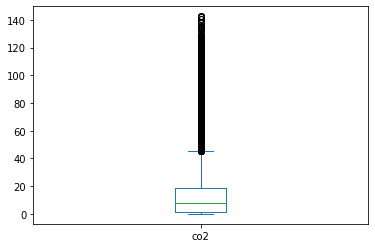

In [39]:
# Convert PySpark DataFrame to Pandas DataFrame
selected_col_pd1 = selected_col1.toPandas()

# Box plot after imputing null values
selected_col_pd1['co2'].plot.box()

# Show plots
plt.show()

In [40]:
from pyspark.sql.functions import when, col
# Create new dummy variable
selected_col1 = selected_col1.withColumn("co2_level", when(col("co2") <= 30, "Low CO2").otherwise("High CO2"))

# Explore co2_level datatype
selected_col1.printSchema()

# Describe co2_level column
selected_col1.groupBy("co2_level").count().show()

root
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- year: long (nullable = true)
 |-- co2: double (nullable = true)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- co2_level: string (nullable = false)

+---------+-----+
|co2_level|count|
+---------+-----+
|  Low CO2| 3690|
| High CO2|  878|
+---------+-----+



<AxesSubplot:ylabel='count'>

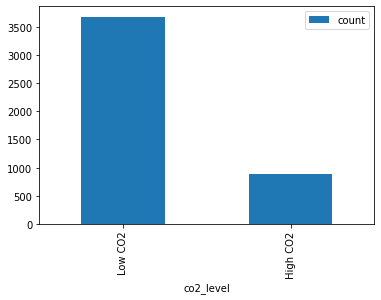

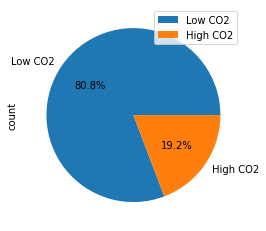

In [41]:
# Plot bar chart for co2_level column
selected_col1.groupBy("co2_level").count().toPandas().plot(kind="bar", x="co2_level", y="count")

# Plot pie chart for co2_level column
selected_col1.groupBy("co2_level").count().toPandas().plot(kind="pie", labels=["Low CO2", "High CO2"], y="count", autopct='%1.1f%%')

In [42]:
# Integrate two datasets
integrated_col1 = selected_col1.join(oxid_co2_2, on=["country", "state", "year"], how="inner")

integrated_col1.printSchema()

root
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- year: long (nullable = true)
 |-- co2: double (nullable = true)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- iso_code: string (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)
 |-- oil_co2: double (nullable = true)
 |-- cement_co2_per_capita: double (nullable = true)
 |-- coal_co2_per_capita: double (nullable = true)
 |-- flaring_co2_per_capita: double (nullable = true)
 |-- gas_co2_per_capita: double (nullable = true)
 |-- oil_co2_per_capita: double (nullable = true)
 |-- primary_energy_consumption: double (nullable = true)
 |-- energy_per_capita: double (nullable = true)
 |-- energy_per_gdp: double (nullable =

In [43]:
# Selected variables that related to objective
selected_col2 = integrated_col1.select('country','state','year','co2','co2_level','methane','nitrous_oxide','population','gdp','coal_co2','cement_co2','flaring_co2','gas_co2','oil_co2','primary_energy_consumption')

selected_col2.printSchema()

root
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- year: long (nullable = true)
 |-- co2: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)
 |-- oil_co2: double (nullable = true)
 |-- primary_energy_consumption: double (nullable = true)



In [44]:
# Imputing missing, outlier and extreme values
quantiles_coal_co2 = selected_col2.stat.approxQuantile("coal_co2", [0.25, 0.75], 0.0)
Q1_coal_co2 = quantiles_coal_co2[0]
Q3_coal_co2 = quantiles_coal_co2[1]
IQR_coal_co2 = Q3_coal_co2 - Q1_coal_co2
upper_coal_co2 = Q3_coal_co2 + 1.5 * IQR_coal_co2
selected_col2 = selected_col2.withColumn("coal_co2", when(col("coal_co2") > upper_coal_co2, lit(None)).otherwise(col("coal_co2")))
mean_value_coal_co2_2 = selected_col2.selectExpr("mean(coal_co2) as mean_coal_co2").collect()[0]["mean_coal_co2"]
mean_value_coal_co2_2 = round(mean_value_coal_co2_2, 2)
selected_col2 = selected_col2.withColumn("coal_co2", when(col("coal_co2").isNull(), mean_value_coal_co2_2).otherwise(col("coal_co2")))

In [45]:
quantiles_cement_co2 = selected_col2.stat.approxQuantile("cement_co2", [0.25, 0.75], 0.0)
Q1_cement_co2 = quantiles_cement_co2[0]
Q3_cement_co2 = quantiles_cement_co2[1]
IQR_cement_co2 = Q3_cement_co2 - Q1_cement_co2
upper_cement_co2 = Q3_cement_co2 + 1.5 * IQR_cement_co2
selected_col2 = selected_col2.withColumn("cement_co2", when(col("cement_co2") > upper_cement_co2, lit(None)).otherwise(col("cement_co2")))
mean_value_cement_co2_2 = selected_col2.selectExpr("mean(cement_co2) as mean_cement_co2").collect()[0]["mean_cement_co2"]
mean_value_cement_co2_2 = round(mean_value_cement_co2_2, 2)
selected_col2 = selected_col2.withColumn("cement_co2", when(col("cement_co2").isNull(), mean_value_cement_co2_2).otherwise(col("cement_co2")))

In [46]:
quantiles_flaring_co2 = selected_col2.stat.approxQuantile("flaring_co2", [0.25, 0.75], 0.0)
Q1_flaring_co2 = quantiles_flaring_co2[0]
Q3_flaring_co2 = quantiles_flaring_co2[1]
IQR_flaring_co2 = Q3_flaring_co2 - Q1_flaring_co2
upper_flaring_co2 = Q3_flaring_co2 + 1.5 * IQR_flaring_co2
selected_col2 = selected_col2.withColumn("flaring_co2", when(col("flaring_co2") > upper_flaring_co2, lit(None)).otherwise(col("flaring_co2")))
mean_value_flaring_co2_2 = selected_col2.selectExpr("mean(flaring_co2) as mean_flaring_co2").collect()[0]["mean_flaring_co2"]
mean_value_flaring_co2_2 = round(mean_value_flaring_co2_2, 2)
selected_col2 = selected_col2.withColumn("flaring_co2", when(col("flaring_co2").isNull(), mean_value_flaring_co2_2).otherwise(col("flaring_co2")))

In [47]:
quantiles_gas_co2 = selected_col2.stat.approxQuantile("gas_co2", [0.25, 0.75], 0.0)
Q1_gas_co2 = quantiles_gas_co2[0]
Q3_gas_co2 = quantiles_gas_co2[1]
IQR_gas_co2 = Q3_gas_co2 - Q1_gas_co2
upper_gas_co2 = Q3_gas_co2 + 1.5 * IQR_gas_co2
selected_col2 = selected_col2.withColumn("gas_co2", when(col("gas_co2") > upper_gas_co2, lit(None)).otherwise(col("gas_co2")))
mean_value_gas_co2_2 = selected_col2.selectExpr("mean(gas_co2) as mean_gas_co2").collect()[0]["mean_gas_co2"]
mean_value_gas_co2_2 = round(mean_value_gas_co2_2, 2)
selected_col2 = selected_col2.withColumn("gas_co2", when(col("gas_co2").isNull(), mean_value_gas_co2_2).otherwise(col("gas_co2")))

In [48]:
quantiles_oil_co2 = selected_col2.stat.approxQuantile("oil_co2", [0.25, 0.75], 0.0)
Q1_oil_co2 = quantiles_oil_co2[0]
Q3_oil_co2 = quantiles_oil_co2[1]
IQR_oil_co2 = Q3_oil_co2 - Q1_oil_co2
upper_oil_co2 = Q3_oil_co2 + 1.5 * IQR_oil_co2
selected_col2 = selected_col2.withColumn("oil_co2", when(col("oil_co2") > upper_oil_co2, lit(None)).otherwise(col("oil_co2")))
mean_value_oil_co2_2 = selected_col2.selectExpr("mean(oil_co2) as mean_oil_co2").collect()[0]["mean_oil_co2"]
mean_value_oil_co2_2 = round(mean_value_oil_co2_2, 2)
selected_col2 = selected_col2.withColumn("oil_co2", when(col("oil_co2").isNull(), mean_value_oil_co2_2).otherwise(col("oil_co2")))

In [49]:
quantiles_primary_energy_consumption = selected_col2.stat.approxQuantile("primary_energy_consumption", [0.25, 0.75], 0.0)
Q1_primary_energy_consumption = quantiles_primary_energy_consumption[0]
Q3_primary_energy_consumption = quantiles_primary_energy_consumption[1]
IQR_primary_energy_consumption = Q3_primary_energy_consumption - Q1_primary_energy_consumption
upper_primary_energy_consumption = Q3_primary_energy_consumption + 1.5 * IQR_primary_energy_consumption
selected_col2 = selected_col2.withColumn("primary_energy_consumption", when(col("primary_energy_consumption") > upper_primary_energy_consumption, lit(None)).otherwise(col("primary_energy_consumption")))
mean_value_primary_energy_consumption_2 = selected_col2.selectExpr("mean(primary_energy_consumption) as mean_primary_energy_consumption").collect()[0]["mean_primary_energy_consumption"]
mean_value_primary_energy_consumption_2 = round(mean_value_primary_energy_consumption_2, 2)
selected_col2 = selected_col2.withColumn("primary_energy_consumption", when(col("primary_energy_consumption").isNull(), mean_value_primary_energy_consumption_2).otherwise(col("primary_energy_consumption")))

In [50]:
# Test if null value still exists
nan_counts2 = selected_col2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_col2.columns])
nan_counts2.show()

+-------+-----+----+---+---------+-------+-------------+----------+---+--------+----------+-----------+-------+-------+--------------------------+
|country|state|year|co2|co2_level|methane|nitrous_oxide|population|gdp|coal_co2|cement_co2|flaring_co2|gas_co2|oil_co2|primary_energy_consumption|
+-------+-----+----+---+---------+-------+-------------+----------+---+--------+----------+-----------+-------+-------+--------------------------+
|      0|    0|   0|  0|        0|      0|            0|         0|  0|       0|         0|          0|      0|      0|                         0|
+-------+-----+----+---+---------+-------+-------------+----------+---+--------+----------+-----------+-------+-------+--------------------------+



In [51]:
# Summary statistics after imputing
selected_col2.select('co2','methane','nitrous_oxide','population','gdp').describe().show()
selected_col2.select('coal_co2','cement_co2','flaring_co2','gas_co2','oil_co2','primary_energy_consumption').describe().show()

+-------+------------------+------------------+-----------------+-------------------+--------------------+
|summary|               co2|           methane|    nitrous_oxide|         population|                 gdp|
+-------+------------------+------------------+-----------------+-------------------+--------------------+
|  count|              4568|              4568|             4568|               4568|                4568|
|   mean|18.792194395796667| 24.44432793344981|8.715313047285548|  9824147.678288119|2.870791411922613E11|
| stddev|26.688868183208406|20.788178588440783|7.285146118213915|1.171926447085383E7|2.518370843053591E11|
|    min|             0.004|               0.0|              0.0|             1606.0|       3.128535636E8|
|    max|           142.552|             97.28|            34.31|        5.4409794E7| 1.25150272216398E12|
+-------+------------------+------------------+-----------------+-------------------+--------------------+

+-------+------------------+--------

In [52]:
# 04-DT
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import RandomForestRegressor

# Convert population and gdp units to 100000
selected_col2 = selected_col2.withColumn("population", selected_col2["population"] / 100000)
selected_col2 = selected_col2.withColumn("gdp", selected_col2["gdp"] / 100000)

# Define features vector for the first model
feature_columns1 = ["year", "methane", "nitrous_oxide", "population", "gdp", "primary_energy_consumption"]
assembler1 = VectorAssembler(inputCols=feature_columns1, outputCol="features1")
selected_col3 = assembler1.transform(selected_col2)

# Feature scaling for the first model
scaler1 = StandardScaler(inputCol="features1", outputCol="scaled_features1")
scaler_model1 = scaler1.fit(selected_col3)
selected_col3 = scaler_model1.transform(selected_col3)

# Define the label column for the first model
selected_col3 = selected_col3.withColumnRenamed("co2", "label")

# Train RandomForestRegressor model for the first set of features
rf_model1 = RandomForestRegressor(featuresCol="scaled_features1", labelCol="label")
rf_model1 = rf_model1.fit(selected_col3)

# Get feature importance scores for the first model
importance_scores1 = rf_model1.featureImportances.toArray()

# Print feature importance scores for the first model
for i, score in enumerate(importance_scores1):
    print(f"Feature '{feature_columns1[i]}': {score}")

Feature 'year': 0.007178489473032276
Feature 'methane': 0.05252021523334092
Feature 'nitrous_oxide': 0.019252440281678256
Feature 'population': 0.13964183525048407
Feature 'gdp': 0.0973498868752314
Feature 'primary_energy_consumption': 0.6840571328862329


In [53]:
# Define features vector for the second model
feature_columns2 = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2"]
assembler2 = VectorAssembler(inputCols=feature_columns2, outputCol="features2")
selected_col4 = assembler2.transform(selected_col2)

# Feature scaling for the second model
scaler2 = StandardScaler(inputCol="features2", outputCol="scaled_features2")
scaler_model2 = scaler2.fit(selected_col4)
selected_col4 = scaler_model2.transform(selected_col4)

# Define the label column for the second model
selected_col4 = selected_col4.withColumnRenamed("co2", "label")

# Train RandomForestRegressor model for the second set of features
rf_model2 = RandomForestRegressor(featuresCol="scaled_features2", labelCol="label")
rf_model2 = rf_model2.fit(selected_col4)

# Get feature importance scores for the second model
importance_scores2 = rf_model2.featureImportances.toArray()

# Print feature importance scores for the second model
for i, score in enumerate(importance_scores2):
    print(f"Feature '{feature_columns2[i]}': {score}")

Feature 'cement_co2': 0.24142623264390686
Feature 'coal_co2': 0.15588242295854748
Feature 'flaring_co2': 0.04017930318612963
Feature 'gas_co2': 0.17530183975116032
Feature 'oil_co2': 0.38721020146025587


In [54]:
# Selected columns
feature_cols2 = selected_col2.select("co2","cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2")

# Calculate the correlation between each pair of columns
correlations2 = [(c1, c2, round(feature_cols2.agg(F.corr(c1, c2)).collect()[0][0], 2))
                for i, c1 in enumerate(feature_cols2.columns)
                for c2 in feature_cols2.columns[i+1:]]

# Print the correlation between each pair of columns
for c1, c2, corr in correlations2:
    print("Correlation between", c1, "and", c2, ":", corr)

Correlation between co2 and cement_co2 : 0.39
Correlation between co2 and coal_co2 : 0.27
Correlation between co2 and flaring_co2 : -0.01
Correlation between co2 and gas_co2 : 0.2
Correlation between co2 and oil_co2 : 0.72
Correlation between cement_co2 and coal_co2 : 0.21
Correlation between cement_co2 and flaring_co2 : 0.25
Correlation between cement_co2 and gas_co2 : 0.25
Correlation between cement_co2 and oil_co2 : 0.42
Correlation between coal_co2 and flaring_co2 : 0.1
Correlation between coal_co2 and gas_co2 : 0.26
Correlation between coal_co2 and oil_co2 : 0.2
Correlation between flaring_co2 and gas_co2 : 0.29
Correlation between flaring_co2 and oil_co2 : 0.01
Correlation between gas_co2 and oil_co2 : 0.12


In [55]:
# Select necessary attributes
selected_col5 = selected_col2.select('year','co2','co2_level','methane','nitrous_oxide','population','gdp','coal_co2','cement_co2','flaring_co2','gas_co2')

selected_col5.printSchema()

root
 |-- year: long (nullable = true)
 |-- co2: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)



In [56]:
# Convert categorical to numeric variable
selected_col5 = selected_col5.withColumn("co2_level_int"
    ,when(selected_col5["co2_level"] == "Low CO2", 0)
    .when(selected_col5["co2_level"] == "High CO2", 1)
    .otherwise(None))

# Show result
selected_col5.show()

# Check datatypes
selected_col5.printSchema()

+----+------+---------+-------+-------------+-----------+------------------+--------+----------+-----------+-------+-------------+
|year|   co2|co2_level|methane|nitrous_oxide| population|               gdp|coal_co2|cement_co2|flaring_co2|gas_co2|co2_level_int|
+----+------+---------+-------+-------------+-----------+------------------+--------+----------+-----------+-------+-------------+
|2015| 0.465|  Low CO2|   0.05|          0.0|    0.77993|   5227631.1702688|     0.0|       0.0|        0.0|    0.0|            0|
|2008|25.486|  Low CO2|  49.94|        19.66|  216.95636|  1055916.54302997|     0.0|     0.685|       1.41|  1.271|            0|
|2009| 0.191|  Low CO2|  41.56|        14.68|    0.27035|   5227631.1702688|    9.78|      1.36|       1.41|   20.2|            0|
|2015| 6.954|  Low CO2|    9.5|         0.15|    4.14914|   5227631.1702688|    9.78|      1.36|      0.418|  4.891|            0|
|2002| 2.206|  Low CO2|  16.76|         4.37|  126.37719|   224876.45150737|    9.7

In [57]:
# 05-MS
# For objective1, using Regression method

# For objective2, using classification method

In [58]:
# 06-AS
# Selected columns
feature_cols3 = selected_col2.select("co2","year", "methane", "nitrous_oxide", "gdp", "primary_energy_consumption")

# Calculate the correlation between each pair of columns
correlations3 = [(c1, c2, round(feature_cols3.agg(F.corr(c1, c2)).collect()[0][0], 2))
                for i, c1 in enumerate(feature_cols3.columns)
                for c2 in feature_cols3.columns[i+1:]]

# Print the correlation between each pair of columns
for c1, c2, corr in correlations3:
    print("Correlation between", c1, "and", c2, ":", corr)

Correlation between co2 and year : -0.0
Correlation between co2 and methane : 0.15
Correlation between co2 and nitrous_oxide : 0.1
Correlation between co2 and gdp : 0.06
Correlation between co2 and primary_energy_consumption : 0.72
Correlation between year and methane : 0.29
Correlation between year and nitrous_oxide : 0.28
Correlation between year and gdp : 0.21
Correlation between year and primary_energy_consumption : 0.07
Correlation between methane and nitrous_oxide : 0.83
Correlation between methane and gdp : 0.36
Correlation between methane and primary_energy_consumption : 0.24
Correlation between nitrous_oxide and gdp : 0.35
Correlation between nitrous_oxide and primary_energy_consumption : 0.19
Correlation between gdp and primary_energy_consumption : 0.21


In [59]:
# Check null value for objective2
selected_col5.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in ['co2_level_int','coal_co2','cement_co2','flaring_co2','gas_co2']]).show()

+-------------+--------+----------+-----------+-------+
|co2_level_int|coal_co2|cement_co2|flaring_co2|gas_co2|
+-------------+--------+----------+-----------+-------+
|            0|       0|         0|          0|      0|
+-------------+--------+----------+-----------+-------+



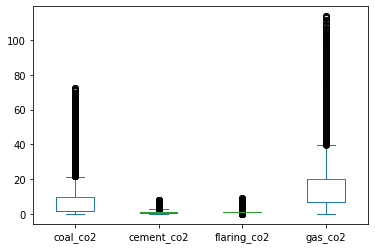

In [60]:
# Convert PySpark DataFrame to Pandas DataFrame
pd_data = selected_col5.select(['coal_co2','cement_co2','flaring_co2','gas_co2']).toPandas()
pd_data.plot.box()
plt.show()

In [61]:
# For objective1, using Random Forest algorithm
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler

# Define dependent and independent variables
Y1=selected_col5.select("co2")
X1=selected_col5.select("year", "methane", "population", "nitrous_oxide", "gdp")

Y1.show()
X1.show()

feature_columns3 = ["year", "methane", "nitrous_oxide", "population", "gdp"]

assembler3 = VectorAssembler(inputCols=feature_columns3, outputCol="features3")
data_with_features3 = assembler3.transform(selected_col5)

# Print schema, the features output column has been added. 
data_with_features3.printSchema()

# The features column is a dense vector that combines the various features as expected.
data_with_features3.head(1)

+------+
|   co2|
+------+
| 0.465|
|25.486|
| 0.191|
| 6.954|
| 2.206|
| 2.997|
| 18.79|
|25.216|
|19.112|
| 8.206|
|67.962|
| 9.985|
| 4.228|
| 0.143|
| 0.798|
| 0.575|
|  0.15|
|  0.34|
| 42.68|
|43.638|
+------+
only showing top 20 rows

+----+-------+-----------+-------------+------------------+
|year|methane| population|nitrous_oxide|               gdp|
+----+-------+-----------+-------------+------------------+
|2015|   0.05|    0.77993|          0.0|   5227631.1702688|
|2008|  49.94|  216.95636|        19.66|  1055916.54302997|
|2009|  41.56|    0.27035|        14.68|   5227631.1702688|
|2015|    9.5|    4.14914|         0.15|   5227631.1702688|
|2002|  16.76|  126.37719|         4.37|   224876.45150737|
|2006|  20.58|  134.77705|         5.28|   307876.32700112|
|2004|  41.56|323.8286978|        14.68|   5227631.1702688|
|2001|  12.45|  111.64676|          3.9|473019.68760199996|
|2006|   7.35|   92.18681|         2.77|   819400.77447399|
|2007|   7.55|    78.0852|         2.8

[Row(year=2015, co2=0.465, co2_level='Low CO2', methane=0.05, nitrous_oxide=0.0, population=0.77993, gdp=5227631.1702688, coal_co2=0.0, cement_co2=0.0, flaring_co2=0.0, gas_co2=0.0, co2_level_int=0, features3=DenseVector([2015.0, 0.05, 0.0, 0.7799, 5227631.1703]))]

In [62]:
# Select the label and features columns
data_for_rf = data_with_features3.select(col("co2").alias("label"), "features3")

In [63]:
# For objective2, using Logistic algorithm
from pyspark.ml.classification import LogisticRegression

# Define dependent and independent variables
Y2=selected_col5.select('co2_level_int')
X2=selected_col5.select('coal_co2','cement_co2','flaring_co2','gas_co2')

Y2.show()
X2.show()

feature_columns4 = ["coal_co2","cement_co2", "flaring_co2", "gas_co2"]
assembler4 = VectorAssembler(inputCols=feature_columns4, outputCol="features4")
data_with_features4 = assembler4.transform(selected_col5)

# Print schema, the features output column has been added. 
data_with_features4.printSchema()

# The features column is a dense vector that combines the various features as expected.
data_with_features4.head(2)

+-------------+
|co2_level_int|
+-------------+
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            1|
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            0|
|            1|
|            1|
+-------------+
only showing top 20 rows

+--------+----------+-----------+-------+
|coal_co2|cement_co2|flaring_co2|gas_co2|
+--------+----------+-----------+-------+
|     0.0|       0.0|        0.0|    0.0|
|     0.0|     0.685|       1.41|  1.271|
|    9.78|      1.36|       1.41|   20.2|
|    9.78|      1.36|      0.418|  4.891|
|    9.78|      1.36|       1.41|   20.2|
|    9.78|      1.36|       1.41|   20.2|
|    9.78|      1.36|       1.41|   20.2|
|   0.099|     0.799|       1.41|  1.143|
|   1.868|     1.535|       1.41|   0.59|
|   0.191|     0.643|       1.41|   20.2|
|  13.008|     1.771|      0.118| 17.782|
| 

[Row(year=2015, co2=0.465, co2_level='Low CO2', methane=0.05, nitrous_oxide=0.0, population=0.77993, gdp=5227631.1702688, coal_co2=0.0, cement_co2=0.0, flaring_co2=0.0, gas_co2=0.0, co2_level_int=0, features4=SparseVector(4, {})),
 Row(year=2008, co2=25.486, co2_level='Low CO2', methane=49.94, nitrous_oxide=19.66, population=216.95636, gdp=1055916.54302997, coal_co2=0.0, cement_co2=0.685, flaring_co2=1.41, gas_co2=1.271, co2_level_int=0, features4=DenseVector([0.0, 0.685, 1.41, 1.271]))]

In [64]:
# Select the label and features columns
data_for_lr = data_with_features4.select(col("co2_level_int").alias("label"), "features4")

In [65]:
# 07-DM
# For objective1, split data into trainin and test sets - use 20% for the test set and 80% for the train set; use a fixed seed 250
train_rf,test_rf = data_for_rf.randomSplit([0.8, 0.2], seed=250)

In [66]:
# Test training sets
train_rf.count()/selected_col2.count()

0.7937828371278459

In [67]:
# Test testing sets
test_rf.count()/selected_col2.count()

0.2062171628721541

In [68]:
print(test_rf.count())

942


In [69]:
# Training a Random Forest Regression Model
from pyspark.ml.evaluation import RegressionEvaluator
rf_model = RandomForestRegressor(featuresCol="features3", labelCol="label")
rf_model = rf_model.fit(train_rf)

# Printing the Importance of Random Forest Model Features
rf_feature_importances = rf_model.featureImportances.toArray()
for i, score in enumerate(rf_feature_importances):
    print(f"Feature '{feature_columns3[i]}': {score}")

Feature 'year': 0.005827955107450024
Feature 'methane': 0.1540315874218608
Feature 'nitrous_oxide': 0.09286604162606296
Feature 'population': 0.3668629189624707
Feature 'gdp': 0.38041149688215553


In [70]:
# Evaluate the Random Forest Regression Model
predictions = rf_model.transform(test_rf)
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Random Forest Regression Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Random Forest Regression Model Performance:
RMSE: 18.76
MAE: 10.76
R²: 0.50


In [71]:
from scipy.stats import pearsonr
# Obtain true and predicted values
true_and_pred = predictions.select("label", "prediction").collect()
true_values = [row["label"] for row in true_and_pred]
predicted_values = [row["prediction"] for row in true_and_pred]

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(true_values, predicted_values)
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")

Pearson correlation coefficient: 0.72


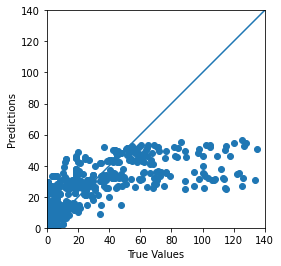

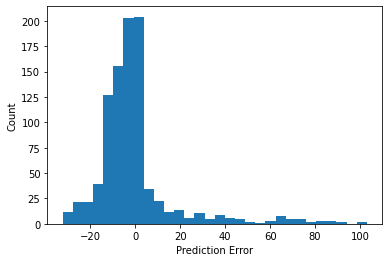

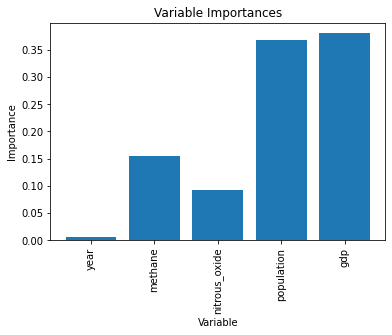

In [72]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
# Obtain true and predicted values
Y1_test = np.array(predictions.select("label").collect()).flatten()
random_forest_predictor = np.array(predictions.select("prediction").collect()).flatten()
random_forest_error = Y1_test - random_forest_predictor

# Draw a scatter plot
plt.figure(1)
plt.clf()
ax = plt.axes(aspect='equal')
plt.scatter(Y1_test, random_forest_predictor)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims = [0, 140]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims, Lims)
plt.grid(False)

# Draw an error histogram
plt.figure(2)
plt.clf()
plt.hist(random_forest_error, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)

# Obtain variable importance data
train_X_column_name = feature_columns3
random_forest_importance = rf_model.featureImportances.toArray()

# Draw a variable importance diagram
plt.figure(3)
plt.clf()
importance_plot_x_values = list(range(len(random_forest_importance)))

# Using variable names as horizontal axis labels
plt.bar(importance_plot_x_values, random_forest_importance, tick_label=train_X_column_name)
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')
plt.show()

In [73]:
# For objective2, split data into training and test sets - use 20% for the test set and 80% for the train set; use a fixed seed 250
train_lr,test_lr = data_for_lr.randomSplit([0.8, 0.2], seed=300)

In [74]:
# Test training sets
train_lr.count()/selected_col2.count()

0.8071366024518388

In [75]:
# Test testing sets
test_lr.count()/selected_col2.count()

0.19286339754816112

In [76]:
# Training logistic regression models
from pyspark.ml.evaluation import BinaryClassificationEvaluator
lr_model = LogisticRegression(featuresCol="features4", labelCol="label")
lr_model = lr_model.fit(train_lr)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="label")
predictions = lr_model.transform(test_lr)
accuracy = evaluator.evaluate(predictions)
print(f"Model accuracy of AUC: {accuracy}")

# Print logistic regression model coefficients
lr_coefficients = lr_model.coefficients.toArray()
intercept = lr_model.intercept
print(f"Intercept: {intercept}")
for i, coef in enumerate(lr_coefficients):
    print(f"Feature '{feature_columns4[i]}': {coef}")

24/05/18 23:15:23 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/18 23:15:23 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


Model accuracy of AUC: 0.7117092844779713
Intercept: -1.8048433506349773
Feature 'coal_co2': 0.03340486124040719
Feature 'cement_co2': 0.45225821776041664
Feature 'flaring_co2': -0.4167475104598767
Feature 'gas_co2': -0.006054704394523553


In [77]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [78]:
# Print model summary using statsmodels in Pandas
import statsmodels.api as sm

# Convert Spark DataFrame to Pandas DataFrame for visualization
selected_col5_pd = selected_col5.toPandas()

X2_pd = selected_col5_pd[feature_columns4]
X2_pd = sm.add_constant(X2_pd)  # Add constant term
Y2_pd = selected_col5_pd['co2_level_int']
logit_model = sm.Logit(Y2_pd, X2_pd)
result = logit_model.fit()

print(result.summary())
print("LL", result.llf)
print("AIC:", result.aic)
print("BIC:", result.bic)

Optimization terminated successfully.
         Current function value: 0.443321
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          co2_level_int   No. Observations:                 4568
Model:                          Logit   Df Residuals:                     4563
Method:                           MLE   Df Model:                            4
Date:                Sat, 18 May 2024   Pseudo R-squ.:                 0.09417
Time:                        23:15:28   Log-Likelihood:                -2025.1
converged:                       True   LL-Null:                       -2235.6
Covariance Type:            nonrobust   LLR p-value:                 7.908e-90
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8203      0.083    -22.021      0.000      -1.982      -1.658
coal_co2        0.0339    

In [79]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the Logistic model
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

lr_acc = acc_evaluator.evaluate(predictions)
lr_precision = precision_evaluator.evaluate(predictions)
lr_recall = recall_evaluator.evaluate(predictions)
lr_f1 = f1_evaluator.evaluate(predictions)

print('Logistic Regression Performance:')
print('Accuracy: {0:2.2f}%'.format(lr_acc * 100))
print('Precision: {0:2.2f}%'.format(lr_precision * 100))
print('Recall: {0:2.2f}%'.format(lr_recall * 100))
print('F1 Score: {0:2.2f}%'.format(lr_f1 * 100))

Logistic Regression Performance:
Accuracy: 81.84%
Precision: 79.00%
Recall: 81.84%
F1 Score: 77.73%


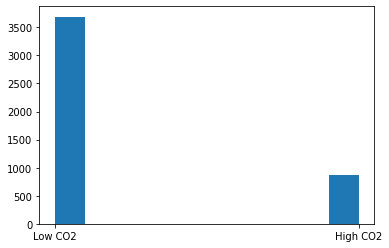

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert co2_level to an array using Numpy and plot it using pyplot. 
co2_level = np.array(selected_col5.select('co2_level').collect())
plt.hist(co2_level)
plt.show()

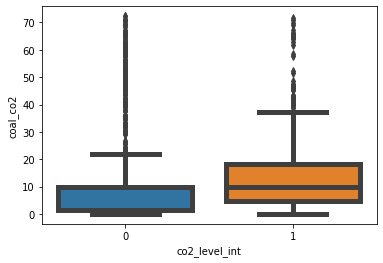

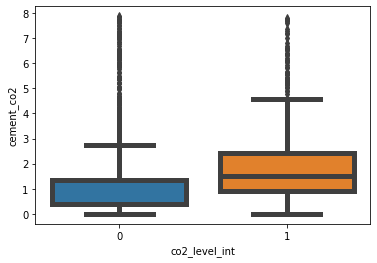

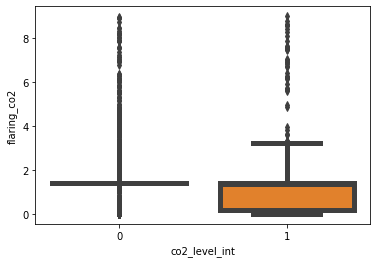

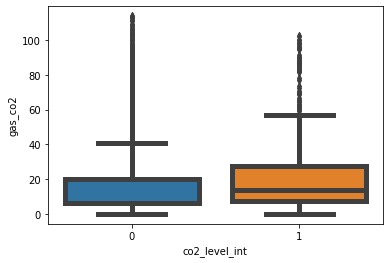

In [81]:
# Box plots
sns.boxplot(x=selected_col5_pd['co2_level_int'], y=selected_col5_pd["coal_co2"], linewidth=5) # box plot for coal_co2
plt.show()

sns.boxplot(x=selected_col5_pd['co2_level_int'], y=selected_col5_pd["cement_co2"], linewidth=5) # box plot for cement_co2
plt.show()

sns.boxplot(x=selected_col5_pd['co2_level_int'], y=selected_col5_pd["flaring_co2"], linewidth=5) # box plot for flaring_co2
plt.show()

sns.boxplot(x=selected_col5_pd['co2_level_int'], y=selected_col5_pd["gas_co2"], linewidth=5) # box plot for gas_co2
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei, Arial


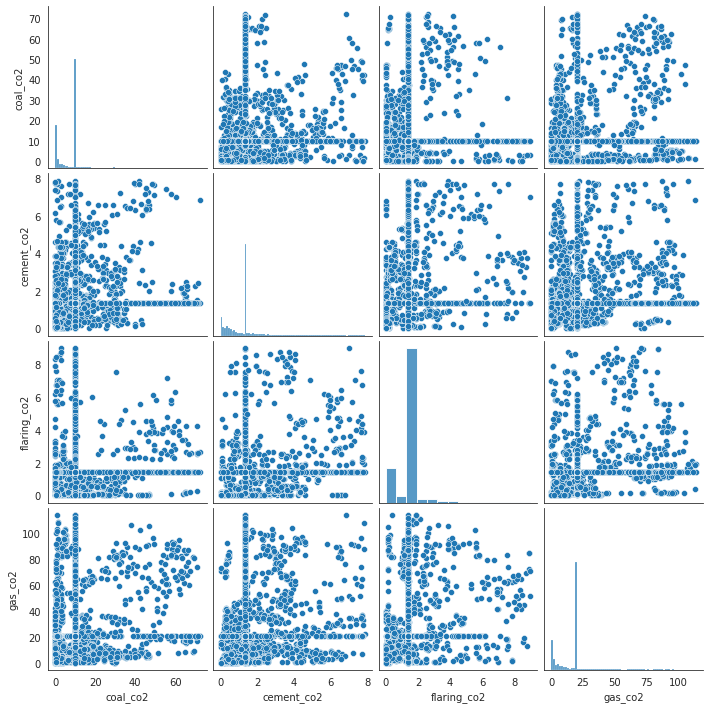

In [82]:
# Pair plot
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})
sns.pairplot(selected_col5_pd[feature_columns4]) # pair plot
plt.show()

In [83]:
# 08-Iteration
# Select necessary attributes for re-modeling
selected_col5 = selected_col2.select('co2','co2_level','methane','nitrous_oxide','population','gdp','primary_energy_consumption','coal_co2','cement_co2','flaring_co2','gas_co2', "oil_co2")

# Convert categorical to numeric variable
selected_col5 = selected_col5.withColumn("co2_level_int"
    ,when(selected_col5["co2_level"] == "Low CO2", 0)
    .when(selected_col5["co2_level"] == "High CO2", 1)
    .otherwise(None))

selected_col5.printSchema()

root
 |-- co2: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- primary_energy_consumption: double (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)
 |-- oil_co2: double (nullable = true)
 |-- co2_level_int: integer (nullable = true)



In [84]:
# For objective1, using Random Forest algorithm
# Define dependent and independent variables
feature_columns3 = ["methane","nitrous_oxide","population", "gdp","primary_energy_consumption"]
assembler3 = VectorAssembler(inputCols=feature_columns3, outputCol="features3")
data_with_features3 = assembler3.transform(selected_col5)

# Print schema, the features output column has been added. 
data_with_features3.printSchema()

# The features column is a dense vector that combines the various features as expected.
data_with_features3.head(1)

# Select the label and features columns
data_for_rf = data_with_features3.select(col("co2").alias("label"), "features3")

root
 |-- co2: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- primary_energy_consumption: double (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)
 |-- oil_co2: double (nullable = true)
 |-- co2_level_int: integer (nullable = true)
 |-- features3: vector (nullable = true)



In [85]:
# Split data into trainin and test sets - use 20% for the test set and 80% for the train set; use a fixed seed 250
train_rf,test_rf = data_for_rf.randomSplit([0.8, 0.2], seed=250)

In [86]:
# Training a Random Forest Regression Model
from pyspark.ml.evaluation import RegressionEvaluator
rf_model = RandomForestRegressor(featuresCol="features3", labelCol="label")
rf_model = rf_model.fit(train_rf)

# Printing the Importance of Random Forest Model Features
rf_feature_importances = rf_model.featureImportances.toArray()
for i, score in enumerate(rf_feature_importances):
    print(f"Feature '{feature_columns3[i]}': {score}")

Feature 'methane': 0.05485879775904938
Feature 'nitrous_oxide': 0.029889950423509677
Feature 'population': 0.17255327684372
Feature 'gdp': 0.14301988268863638
Feature 'primary_energy_consumption': 0.5996780922850847


In [87]:
# Evaluate the Random Forest Regression Model
predictions = rf_model.transform(test_rf)
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Random Forest Regression Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Random Forest Regression Model Performance:
RMSE: 12.78
MAE: 6.15
R²: 0.77


In [88]:
# Obtain true and predicted values
true_and_pred = predictions.select("label", "prediction").collect()
true_values = [row["label"] for row in true_and_pred]
predicted_values = [row["prediction"] for row in true_and_pred]

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(true_values, predicted_values)
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")

Pearson correlation coefficient: 0.88


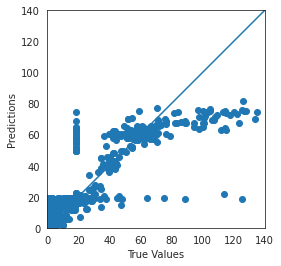

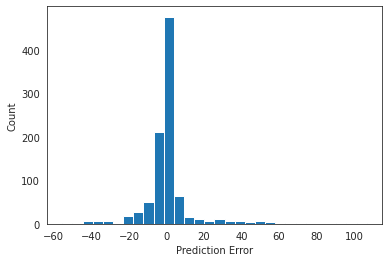

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei, Arial


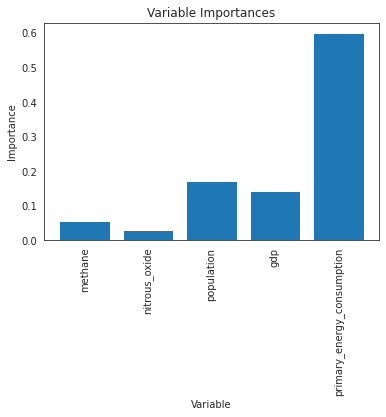

In [89]:
# Obtain true and predicted values
Y1_test = np.array(predictions.select("label").collect()).flatten()
random_forest_predictor = np.array(predictions.select("prediction").collect()).flatten()
random_forest_error = Y1_test - random_forest_predictor

# Draw a scatter plot
plt.figure(1)
plt.clf()
ax = plt.axes(aspect='equal')
plt.scatter(Y1_test, random_forest_predictor)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims = [0, 140]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims, Lims)
plt.grid(False)

# Draw an error histogram
plt.figure(2)
plt.clf()
plt.hist(random_forest_error, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)

# Obtain variable importance data
train_X_column_name = feature_columns3
random_forest_importance = rf_model.featureImportances.toArray()

# Draw a variable importance diagram
plt.figure(3)
plt.clf()
importance_plot_x_values = list(range(len(random_forest_importance)))

# Using variable names as horizontal axis labels
plt.bar(importance_plot_x_values, random_forest_importance, tick_label=train_X_column_name)
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')
plt.show()

In [108]:
# Delete nitrous_oxide variable in the model
feature_columns3 = ["methane","population","gdp","primary_energy_consumption"]
assembler3 = VectorAssembler(inputCols=feature_columns3, outputCol="features3")
data_with_features3 = assembler3.transform(selected_col5)

# Print schema, the features output column has been added. 
data_with_features3.printSchema()

# The features column is a dense vector that combines the various features as expected.
data_with_features3.head(1)

# Select the label and features columns
data_for_rf = data_with_features3.select(col("co2").alias("label"), "features3")

root
 |-- co2: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- primary_energy_consumption: double (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)
 |-- oil_co2: double (nullable = true)
 |-- co2_level_int: integer (nullable = true)
 |-- features3: vector (nullable = true)



In [109]:
# Split data into trainin and test sets - use 20% for the test set and 80% for the train set; use a fixed seed 250
train_rf,test_rf = data_for_rf.randomSplit([0.8, 0.2], seed=250)

In [110]:
# Training a Random Forest Regression Model
from pyspark.ml.evaluation import RegressionEvaluator
rf_model = RandomForestRegressor(featuresCol="features3", labelCol="label")
rf_model = rf_model.fit(train_rf)

# Printing the Importance of Random Forest Model Features
rf_feature_importances = rf_model.featureImportances.toArray()
for i, score in enumerate(rf_feature_importances):
    print(f"Feature '{feature_columns3[i]}': {score}")

Feature 'methane': 0.018120902044434218
Feature 'population': 0.16278496679444734
Feature 'gdp': 0.06978958908681979
Feature 'primary_energy_consumption': 0.7493045420742988


In [111]:
# Evaluate the Random Forest Regression Model
predictions = rf_model.transform(test_rf)
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Random Forest Regression Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Random Forest Regression Model Performance:
RMSE: 11.88
MAE: 5.55
R²: 0.80


In [112]:
# Obtain true and predicted values
true_and_pred = predictions.select("label", "prediction").collect()
true_values = [row["label"] for row in true_and_pred]
predicted_values = [row["prediction"] for row in true_and_pred]

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(true_values, predicted_values)
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")

Pearson correlation coefficient: 0.90


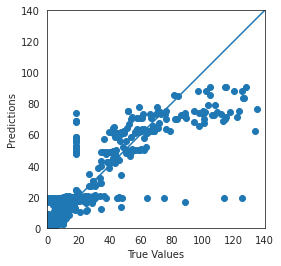

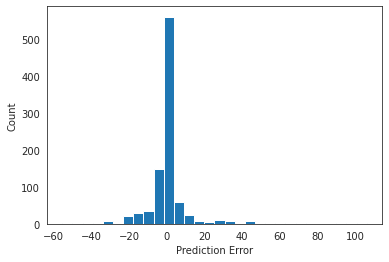

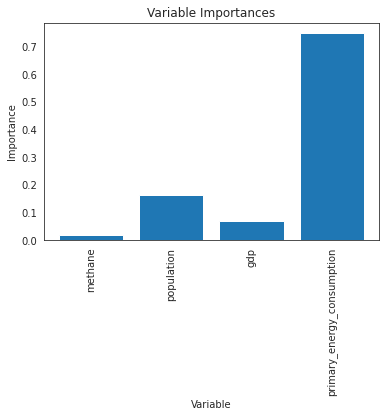

In [95]:
# Obtain true and predicted values
Y1_test = np.array(predictions.select("label").collect()).flatten()
random_forest_predictor = np.array(predictions.select("prediction").collect()).flatten()
random_forest_error = Y1_test - random_forest_predictor

# Draw a scatter plot
plt.figure(1)
plt.clf()
ax = plt.axes(aspect='equal')
plt.scatter(Y1_test, random_forest_predictor)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims = [0, 140]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims, Lims)
plt.grid(False)

# Draw an error histogram
plt.figure(2)
plt.clf()
plt.hist(random_forest_error, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)

# Obtain variable importance data
train_X_column_name = feature_columns3
random_forest_importance = rf_model.featureImportances.toArray()

# Draw a variable importance diagram
plt.figure(3)
plt.clf()
importance_plot_x_values = list(range(len(random_forest_importance)))

# Using variable names as horizontal axis labels
plt.bar(importance_plot_x_values, random_forest_importance, tick_label=train_X_column_name)
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')
plt.show()

In [96]:
# For objective2, using Logistic algorithm
# Define dependent and independent variables
feature_columns4 = ["coal_co2","cement_co2","flaring_co2", "gas_co2","oil_co2"]
assembler4 = VectorAssembler(inputCols=feature_columns4, outputCol="features4")
data_with_features4 = assembler4.transform(selected_col5)

# Print schema, the features output column has been added. 
data_with_features4.printSchema()

# The features column is a dense vector that combines the various features as expected.
data_with_features4.head(2)

# Select the label and features columns
data_for_lr = data_with_features4.select(col("co2_level_int").alias("label"), "features4")

root
 |-- co2: double (nullable = true)
 |-- co2_level: string (nullable = false)
 |-- methane: double (nullable = true)
 |-- nitrous_oxide: double (nullable = true)
 |-- population: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- primary_energy_consumption: double (nullable = true)
 |-- coal_co2: double (nullable = true)
 |-- cement_co2: double (nullable = true)
 |-- flaring_co2: double (nullable = true)
 |-- gas_co2: double (nullable = true)
 |-- oil_co2: double (nullable = true)
 |-- co2_level_int: integer (nullable = true)
 |-- features4: vector (nullable = true)



In [97]:
# Split data into training and test sets - use 20% for the test set and 80% for the train set; use a fixed seed 250
train_lr,test_lr = data_for_lr.randomSplit([0.8, 0.2], seed=300)

In [98]:
# Training logistic regression models
from pyspark.ml.evaluation import BinaryClassificationEvaluator
lr_model = LogisticRegression(featuresCol="features4", labelCol="label")
lr_model = lr_model.fit(train_lr)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="label")
predictions = lr_model.transform(test_lr)
accuracy = evaluator.evaluate(predictions)
print(f"Model accuracy of AUC: {accuracy}")

# Print logistic regression model coefficients
lr_coefficients = lr_model.coefficients.toArray()
intercept = lr_model.intercept
print(f"Intercept: {intercept}")
for i, coef in enumerate(lr_coefficients):
    print(f"Feature '{feature_columns4[i]}': {coef}")

Model accuracy of AUC: 0.9283090036249543
Intercept: -2.8447121909669257
Feature 'coal_co2': 0.027505670329391184
Feature 'cement_co2': -0.0514625132980131
Feature 'flaring_co2': -0.22292689637501667
Feature 'gas_co2': -0.006068876903831304
Feature 'oil_co2': 0.13588602649820986


In [99]:
# Print model summary using statsmodels in Pandas
selected_col5_pd = selected_col5.toPandas()

X2_pd = selected_col5_pd[feature_columns4]
X2_pd = sm.add_constant(X2_pd)  # Add constant term
Y2_pd = selected_col5_pd['co2_level_int']
logit_model = sm.Logit(Y2_pd, X2_pd)
result = logit_model.fit()

print(result.summary())
print("LL", result.llf)
print("AIC:", result.aic)
print("BIC:", result.bic)

Optimization terminated successfully.
         Current function value: 0.310476
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          co2_level_int   No. Observations:                 4568
Model:                          Logit   Df Residuals:                     4562
Method:                           MLE   Df Model:                            5
Date:                Sat, 18 May 2024   Pseudo R-squ.:                  0.3656
Time:                        23:15:55   Log-Likelihood:                -1418.3
converged:                       True   LL-Null:                       -2235.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8769      0.103    -27.848      0.000      -3.079      -2.674
coal_co2        0.0289    

In [100]:
# Evaluate the Logistic model
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

lr_acc = acc_evaluator.evaluate(predictions)
lr_precision = precision_evaluator.evaluate(predictions)
lr_recall = recall_evaluator.evaluate(predictions)
lr_f1 = f1_evaluator.evaluate(predictions)

print('Logistic Regression Performance:')
print('Accuracy: {0:2.2f}%'.format(lr_acc * 100))
print('Precision: {0:2.2f}%'.format(lr_precision * 100))
print('Recall: {0:2.2f}%'.format(lr_recall * 100))
print('F1 Score: {0:2.2f}%'.format(lr_f1 * 100))

Logistic Regression Performance:
Accuracy: 88.08%
Precision: 87.50%
Recall: 88.08%
F1 Score: 87.01%


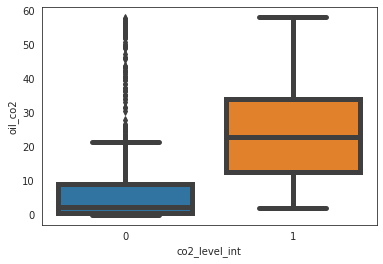

In [101]:
# Box plots
sns.boxplot(x=selected_col5_pd['co2_level_int'], y=selected_col5_pd["oil_co2"], linewidth=5) # box plot for oil_co2
plt.show()

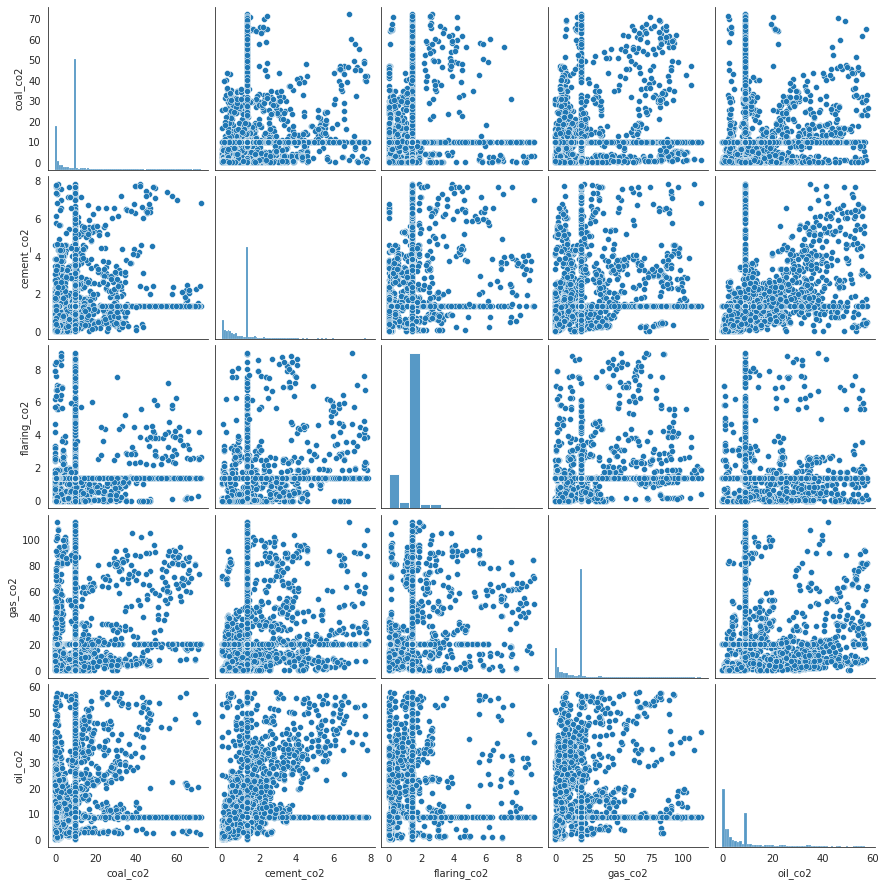

In [102]:
# Pair plot
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})
sns.pairplot(selected_col5_pd[feature_columns4]) # pair plot
plt.show()